## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check top 12 countries

In [2]:
df = pd.read_csv("../output/1_data_exploration.csv")
df

,country,year,iso_code,population,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2,co2_including_luc,gdp
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,2.980,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,3.002,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,3.022,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,3.038,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,3.053,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29862,Zimbabwe,2018,ZWE,15052191.0,51.809,0.558,6.097,10.626,0.0,0.0,8.708,4.060,NaN,-0.088,10.715,19.423,2.678627e+10
29863,Zimbabwe,2019,ZWE,15354606.0,46.120,0.473,5.571,9.918,0.0,0.0,8.079,3.731,NaN,0.143,9.775,17.854,2.514642e+10
29864,Zimbabwe,2020,ZWE,15669663.0,41.997,0.496,4.309,8.668,0.0,0.0,7.609,3.045,NaN,0.818,7.850,15.459,2.317871e+10
29865,Zimbabwe,2021,ZWE,15993525.0,42.145,0.531,4.548,9.484,0.0,0.0,7.117,3.317,NaN,1.088,8.396,15.513,2.514009e+10


1. Charts co2 by year by top 12 countries

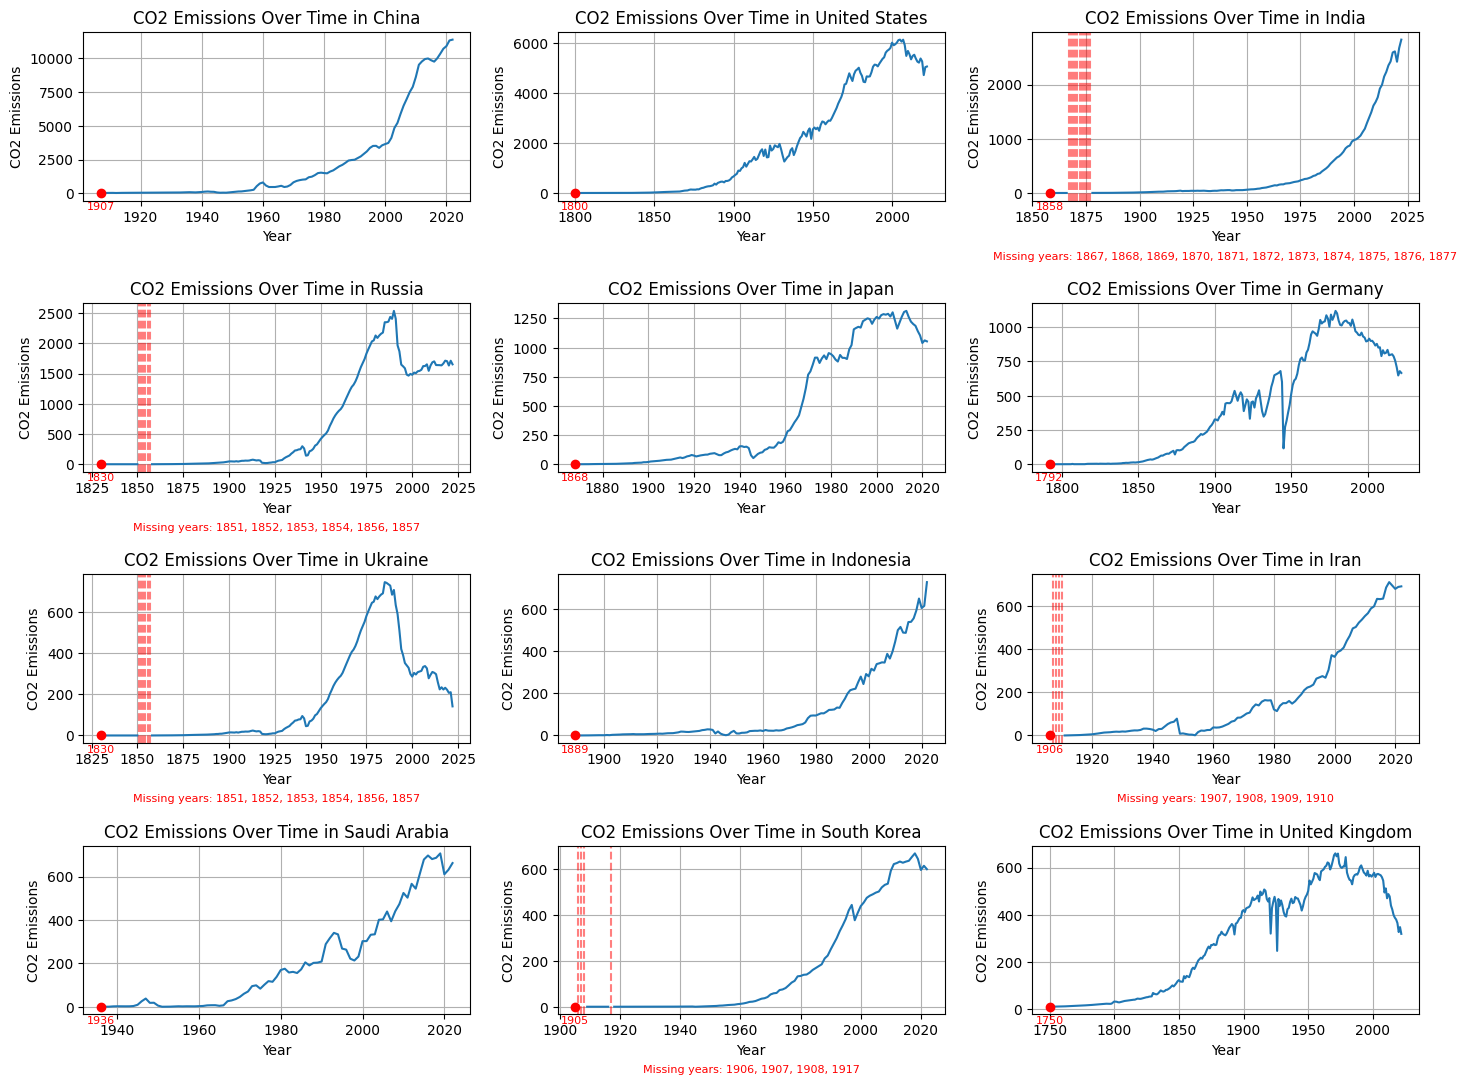

In [3]:
top_countries = df.groupby('country')['co2'].max().nlargest(12).index

num_countries = len(top_countries)
num_cols = 3  # Number of columns for the subplot grid
num_rows = (num_countries - 1) // num_cols + 1  # Calculate the number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 11), squeeze=False)


for i, country in enumerate(top_countries):
    country_df = df[df['country'] == country]
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]

    first_year_nonzero_co2 = country_df.loc[country_df['co2'] > 0, 'year'].min()
    missing_years = country_df[country_df['co2'].isnull() & (country_df['year'] > first_year_nonzero_co2)]['year']

    ax.plot(country_df['year'], country_df['co2'])
    ax.set_title(f'CO2 Emissions Over Time in {country}')
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 Emissions')
    ax.grid(True)

    # Plotting missing years as vertical lines
    for year in missing_years:
        ax.axvline(x=year, color='r', linestyle='--', alpha=0.5)  # Vertical lines for missing years
    
    # Adding text annotation for missing years
    if not missing_years.empty:
        missing_text = f"Missing years: {', '.join(map(str, missing_years))}"
        ax.text(0.5, -0.3, missing_text, ha='center', va='top', fontsize=8, color='red', transform=ax.transAxes)

    # Adding a marker for the first year with non-zero CO2
    if not pd.isna(first_year_nonzero_co2):
        ax.scatter([first_year_nonzero_co2], [country_df.loc[country_df['year'] == first_year_nonzero_co2, 'co2'].iloc[0]], color='red', zorder=5)
        ax.annotate(first_year_nonzero_co2, xy=(first_year_nonzero_co2, country_df.loc[country_df['year'] == first_year_nonzero_co2, 'co2'].iloc[0]), xytext=(0, -12), 
                    textcoords='offset points', ha='center', fontsize=8, color='red')

plt.tight_layout()
plt.show()

In [4]:
top_countries = df.groupby('country')['co2'].max().nlargest(12).index
top_countries_df = df[(df['country'].isin(top_countries))  & (df['year'] >= 1990)].reset_index(drop=True)
top_countries_df

,country,year,iso_code,population,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2,co2_including_luc,gdp
0,China,1990,CHN,1.153704e+09,7938.249,84.513,1976.684,2320.346,0.000,29.301,1368.074,330.291,64.065,-164.509,2484.855,3852.928,3.385122e+12
1,China,1991,CHN,1.170626e+09,8337.610,101.305,2049.920,2399.879,0.000,30.778,1013.113,356.027,68.066,-206.217,2606.096,3619.209,3.508948e+12
2,China,1992,CHN,1.183813e+09,8773.708,122.445,2114.715,2575.993,0.000,30.239,1054.941,385.793,77.596,-154.794,2730.788,3785.728,3.755038e+12
3,China,1993,CHN,1.195856e+09,9457.634,142.774,2228.745,2757.112,0.000,35.728,1087.234,428.549,85.855,-164.539,2921.651,4008.885,4.126170e+12
4,China,1994,CHN,1.207287e+09,10048.812,164.377,2380.586,2750.089,3.737,41.568,1199.356,423.712,89.760,-353.650,3103.739,4303.095,4.438753e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,United States,2018,USA,3.321400e+08,26764.953,38.971,1256.631,5798.152,72.066,1619.275,108.298,2366.168,24.686,420.355,5377.797,5486.095,1.812469e+13
392,United States,2019,USA,3.343197e+08,26574.742,40.896,1071.666,5685.684,88.437,1675.471,112.161,2360.999,24.677,423.539,5262.145,5374.306,1.854055e+13
393,United States,2020,USA,3.359420e+08,24603.098,40.688,877.920,5186.558,67.749,1656.255,114.729,2047.544,24.472,471.929,4714.628,4829.357,1.802736e+13
394,United States,2021,USA,3.369976e+08,25945.025,41.312,1004.531,5572.173,63.294,1659.225,127.596,2239.014,24.837,539.960,5032.213,5159.809,1.909938e+13


In [5]:
#% for all cols
top_countries_df.isna().sum()/top_countries_df.shape[0]*100

country                        0.000000
year                           0.000000
iso_code                       0.000000
population                     0.000000
primary_energy_consumption     0.000000
cement_co2                     0.000000
coal_co2                       0.000000
consumption_co2                3.030303
flaring_co2                    0.000000
gas_co2                        0.000000
land_use_change_co2            0.000000
oil_co2                        0.000000
other_industry_co2            33.333333
trade_co2                      3.030303
co2                            0.000000
co2_including_luc              0.000000
gdp                            0.000000
dtype: float64

In [6]:
top_countries_df = top_countries_df.drop(columns={'other_industry_co2', 'trade_co2', 'consumption_co2', 'iso_code'})

In [7]:
#% for all cols
top_countries_df.isna().sum()/top_countries_df.shape[0]*100

country                       0.0
year                          0.0
population                    0.0
primary_energy_consumption    0.0
cement_co2                    0.0
coal_co2                      0.0
flaring_co2                   0.0
gas_co2                       0.0
land_use_change_co2           0.0
oil_co2                       0.0
co2                           0.0
co2_including_luc             0.0
gdp                           0.0
dtype: float64

In [8]:
top_countries_df = top_countries_df.reindex(columns=['year', 'country', 'population', 'gdp', 'primary_energy_consumption', 'cement_co2', 
                                                     'coal_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2', 'co2_including_luc'])
top_countries_df

,year,country,population,gdp,primary_energy_consumption,cement_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,co2_including_luc
0,1990,China,1.153704e+09,3.385122e+12,7938.249,84.513,1976.684,0.000,29.301,1368.074,330.291,3852.928
1,1991,China,1.170626e+09,3.508948e+12,8337.610,101.305,2049.920,0.000,30.778,1013.113,356.027,3619.209
2,1992,China,1.183813e+09,3.755038e+12,8773.708,122.445,2114.715,0.000,30.239,1054.941,385.793,3785.728
3,1993,China,1.195856e+09,4.126170e+12,9457.634,142.774,2228.745,0.000,35.728,1087.234,428.549,4008.885
4,1994,China,1.207287e+09,4.438753e+12,10048.812,164.377,2380.586,3.737,41.568,1199.356,423.712,4303.095
...,...,...,...,...,...,...,...,...,...,...,...,...
391,2018,United States,3.321400e+08,1.812469e+13,26764.953,38.971,1256.631,72.066,1619.275,108.298,2366.168,5486.095
392,2019,United States,3.343197e+08,1.854055e+13,26574.742,40.896,1071.666,88.437,1675.471,112.161,2360.999,5374.306
393,2020,United States,3.359420e+08,1.802736e+13,24603.098,40.688,877.920,67.749,1656.255,114.729,2047.544,4829.357
394,2021,United States,3.369976e+08,1.909938e+13,25945.025,41.312,1004.531,63.294,1659.225,127.596,2239.014,5159.809


In [9]:
top_countries_df.to_csv('../output/2b_cleaned_data_first_model.csv', index=False)